In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'data.txt'

data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

print('data = ')
print(data.head(10) )
print(data.shape)

data = 
      Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
5  45.083277  56.316372         0
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
9  84.432820  43.533393         1
(100, 3)


In [4]:
print('data.describe = ')
print(data.describe())

data.describe = 
           Exam 1      Exam 2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


In [11]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
print('Admitted student  =\n  ',positive)
print('########################')
print('UnAdmitted student =\n  ',negative)

Admitted student  =
          Exam 1     Exam 2  Admitted
3   60.182599  86.308552         1
4   79.032736  75.344376         1
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
12  82.307053  76.481963         1
13  69.364589  97.718692         1
15  53.971052  89.207350         1
16  69.070144  52.740470         1
18  70.661510  92.927138         1
19  76.978784  47.575964         1
21  89.676776  65.799366         1
24  77.924091  68.972360         1
25  62.271014  69.954458         1
26  80.190181  44.821629         1
30  61.379289  72.807887         1
31  85.404519  57.051984         1
33  52.045405  69.432860         1
37  64.176989  80.908061         1
40  83.902394  56.308046         1
42  94.443368  65.568922         1
46  77.193035  70.458200         1
47  97.771599  86.727822         1
48  62.073064  96.768824         1
49  91.564974  88.696293         1
50  79.944818  74.163119        

Text(0, 0.5, 'Exam 2 Score')

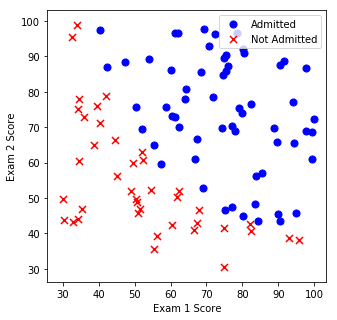

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

Text(0.5, 1.0, 'Sigmoid Function')

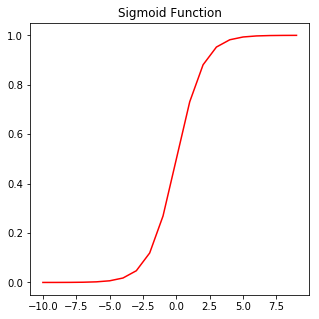

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nums, sigmoid(nums), 'r')
plt.title('Sigmoid Function')

In [16]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [17]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)
print('Newdata \n',data)

Newdata 
     Ones     Exam 1     Exam 2  Admitted
0      1  34.623660  78.024693         0
1      1  30.286711  43.894998         0
2      1  35.847409  72.902198         0
3      1  60.182599  86.308552         1
4      1  79.032736  75.344376         1
5      1  45.083277  56.316372         0
6      1  61.106665  96.511426         1
7      1  75.024746  46.554014         1
8      1  76.098787  87.420570         1
9      1  84.432820  43.533393         1
10     1  95.861555  38.225278         0
11     1  75.013658  30.603263         0
12     1  82.307053  76.481963         1
13     1  69.364589  97.718692         1
14     1  39.538339  76.036811         0
15     1  53.971052  89.207350         1
16     1  69.070144  52.740470         1
17     1  67.946855  46.678574         0
18     1  70.661510  92.927138         1
19     1  76.978784  47.575964         1
20     1  67.372028  42.838438         0
21     1  89.676776  65.799366         1
22     1  50.534788  48.855812         0
23    

In [18]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [19]:
print('X = \n',X)
print('############################################')
print('y = \n',y)

X = 
     Ones     Exam 1     Exam 2
0      1  34.623660  78.024693
1      1  30.286711  43.894998
2      1  35.847409  72.902198
3      1  60.182599  86.308552
4      1  79.032736  75.344376
5      1  45.083277  56.316372
6      1  61.106665  96.511426
7      1  75.024746  46.554014
8      1  76.098787  87.420570
9      1  84.432820  43.533393
10     1  95.861555  38.225278
11     1  75.013658  30.603263
12     1  82.307053  76.481963
13     1  69.364589  97.718692
14     1  39.538339  76.036811
15     1  53.971052  89.207350
16     1  69.070144  52.740470
17     1  67.946855  46.678574
18     1  70.661510  92.927138
19     1  76.978784  47.575964
20     1  67.372028  42.838438
21     1  89.676776  65.799366
22     1  50.534788  48.855812
23     1  34.212061  44.209529
24     1  77.924091  68.972360
25     1  62.271014  69.954458
26     1  80.190181  44.821629
27     1  93.114389  38.800670
28     1  61.830206  50.256108
29     1  38.785804  64.995681
..   ...        ...        ...
70

In [20]:
# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [21]:
print('X = \n',X)
print('############################################')
print('y = \n',y)

X = 
 [[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.27

In [22]:
print('X.shape = ' , X.shape)
print('theta.shape = ' , theta.shape)
print('y.shape = ' , y.shape)

X.shape =  (100, 3)
theta.shape =  (3,)
y.shape =  (100, 1)


In [23]:
thiscost = cost(theta, X, y)
print('cost = ' , thiscost)

cost =  0.6931471805599453


In [28]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
        print('grad[',i,'] \n',grad[i])
    
    return grad
gradient(theta, X, y)

grad[ 0 ] 
 -0.1
grad[ 1 ] 
 -12.009216589291151
grad[ 2 ] 
 -11.262842205513593


array([ -0.1       , -12.00921659, -11.26284221])

In [30]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
gradient(theta, X, y)

grad[ 0 ] 
 -0.1
grad[ 1 ] 
 -12.009216589291151
grad[ 2 ] 
 -11.262842205513593
grad[ 0 ] 
 -0.09999428434588042
grad[ 1 ] 
 -12.008824975404139
grad[ 2 ] 
 -11.262449738643062
grad[ 0 ] 
 0.06290371125539908
grad[ 1 ] 
 -0.8797713877827334
grad[ 2 ] 
 -0.1055109786532039
grad[ 0 ] 
 0.0629037113482184
grad[ 1 ] 
 -0.879771380487147
grad[ 2 ] 
 -0.10551097226482006
grad[ 0 ] 
 0.15274290704251117
grad[ 1 ] 
 6.110288901602039
grad[ 2 ] 
 6.046792622643294
grad[ 0 ] 
 0.15274290668533627
grad[ 1 ] 
 6.110288903548868
grad[ 2 ] 
 6.046792601578528
grad[ 0 ] 
 0.06727203420732102
grad[ 1 ] 
 4.2530524704868675
grad[ 2 ] 
 0.6584744750287937
grad[ 0 ] 
 0.06727201358874438
grad[ 1 ] 
 4.253051194165156
grad[ 2 ] 
 0.6584731455179554
grad[ 0 ] 
 -0.005994352590928218
grad[ 1 ] 
 -0.42869849647453734
grad[ 2 ] 
 -4.084519176938595
grad[ 0 ] 
 -0.005994351940441036
grad[ 1 ] 
 -0.4286984086879428
grad[ 2 ] 
 -4.084519118730248
grad[ 0 ] 
 0.004921340891136241
grad[ 1 ] 
 1.1314933568652683
g

array([ -0.1       , -12.00921659, -11.26284221])

In [32]:
print('result = \n',result)
#this is the best values of theta 0,1,2

result = 
 (array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)


In [33]:
costafteroptimize = cost(result[0], X, y)
print()
print('cost after optimize = ' , costafteroptimize)
print()


cost after optimize =  0.20349770158947458



In [36]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
print('nex predict = ' , predictions)

nex predict =  [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]


In [35]:
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
